In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

data=scipy.io.loadmat("../Downloads/Assignment4/DBSCAN.mat")
main_data=data['Points']
#Check the array and it's shape:
main_data[:5]

array([[ 19.65059308,   9.5178794 ],
       [ -4.76111434,  33.45614907],
       [ 27.83317954,   0.1363595 ],
       [ 35.42154331,  29.50692561],
       [ 60.99887181, -25.96055133]])

In [2]:
#Check it's shape:
main_data.shape

(500, 2)

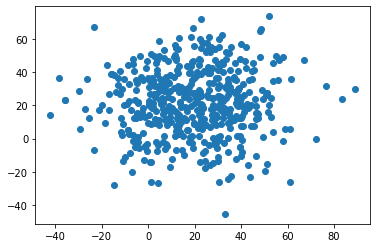

In [3]:
#Plot the points:
x,y=main_data[:,0],main_data[:,1]
plt.scatter(x,y)
plt.show()

In [4]:
def DBSCAN(x,eps,min_pts):
    """
    param x (list of vectors): your dataset to be clustered
    param eps (float): neigborhood radius threshold
    param min_pts (int): minimum number of points threshold for a
    nieghborhood to be a cluster
    """
    
    # label holder:
    labels=[0]*x.shape[0]
    
    #current cluster_id:
    C=0
    
    #Loop:
    #for each index p in the dataset:
    for p in range(0,x.shape[0]):
        #only unvisited sample points can be evaluated as neighbours:
        if not (labels[p]==0):
            continue
            
        #find the neighbours of 'p':
        neighbours=neighbour_search(x,p,eps)
        
        # classify the point as noise , if it doesnt have enough neighbours:
        # otherwise, classify it as a cluster:
        if len(neighbours)< min_pts:
            labels[p]=-1
            
        else:
            C+=1
            neighbour_cluster(x,labels,p,neighbours,C,eps,min_pts)
            
    return labels


def neighbour_cluster(x,labels,p,neighbours,C,eps,min_pts):
    #Assign the cluster label to the original point:
    labels[p]=C
    
    #look at each neighbour of p(index) and evaluate:
    i=0
    while i <len(neighbours):
        
        #Get the next neighbour
        potential_neighbour_ix=neighbours[i]
        
        # if potential neighbour_ix is noise from the previous runs, we can assign it to the current cluster
        if labels[potential_neighbour_ix]==-1:
            labels[potential_neighbour_ix]=C
            
        # If potential neighbour is univisited, we can add it to the current cluster:
        elif labels[potential_neighbour_ix]==0:
            labels[potential_neighbour_ix]=C
            
            #Find more neighbours of this potential neighbour:
            potential_neighbour_cluster=neighbour_search(x,potential_neighbour_ix,eps)
            
            if len(potential_neighbour_cluster)>=min_pts:
                neighbours=neighbours+potential_neighbour_cluster
        
        #evaluate next neighbour:
        i+=1
        
def neighbour_search(x,p,eps):
    neighbours=[]
    
    # for each point in dataset:
    for potential_neighbour in range(0,x.shape[0]):
        
        if np.linalg.norm(x[p] - x[potential_neighbour]) < eps:
            neighbours.append(potential_neighbour)
            
    return neighbours
    

In [5]:
labels=DBSCAN(main_data,5,5)

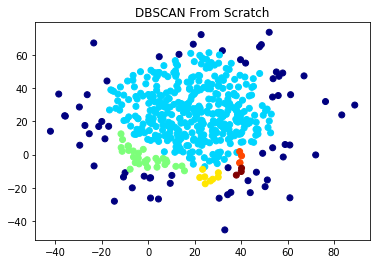

In [6]:
plt.scatter(main_data[:,0],main_data[:,1],c=labels,cmap='jet')
plt.title("DBSCAN From Scratch")
plt.show()

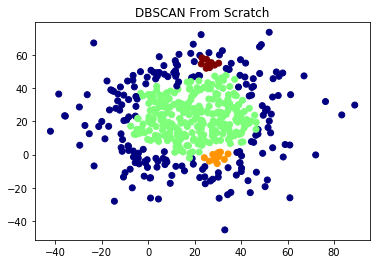

In [7]:
labels_1=DBSCAN(main_data,5,10)
plt.scatter(main_data[:,0],main_data[:,1],c=labels_1,cmap='jet')
plt.title("DBSCAN From Scratch")
plt.show()

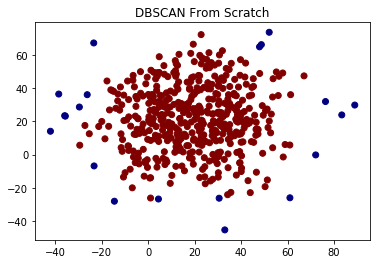

In [8]:
labels_2=DBSCAN(main_data,10,5)
plt.scatter(main_data[:,0],main_data[:,1],c=labels_2,cmap='jet')
plt.title("DBSCAN From Scratch")
plt.show()

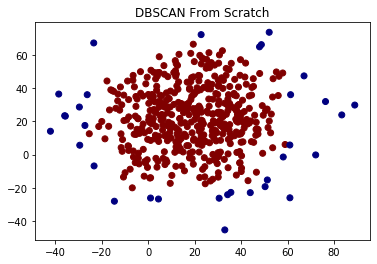

In [9]:
labels_3=DBSCAN(main_data,10,10)
plt.scatter(main_data[:,0],main_data[:,1],c=labels_3,cmap='jet')
plt.title("DBSCAN From Scratch")
plt.show()

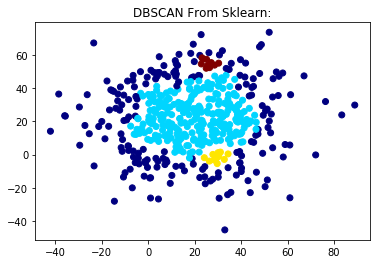

In [10]:
# To compare the performance only and to check whether the algorithm is working fine or not!:
# Compare it with eps=5, min_pts=10 from the above diagram:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 5,min_samples=10).fit(main_data)
dbscanlabels = dbscan.labels_
plt.scatter(main_data[:,0],main_data[:,1],c=dbscanlabels,cmap='jet')
plt.title("DBSCAN From Sklearn:")
plt.show()

In [11]:
# Finding the total number of clusters of each parameter setting:
labels_list=[labels,labels_1,labels_2,labels_3]
for l in (labels_list):
    #Finding the clusters
    clusters=np.unique(l)
    print(clusters)

[-1  1  2  3  4  5]
[-1  1  2  3]
[-1  1]
[-1  1]


In [12]:
# Total no.of points in each cluster of different parameters:
labels_list=[labels,labels_1,labels_2,labels_3]
for l in labels_list:
    unique,counts=np.unique(l,return_counts=True)
    total_counts=dict(zip(unique,counts))
    print(total_counts)

{-1: 65, 1: 391, 2: 29, 3: 8, 4: 4, 5: 3}
{-1: 194, 1: 284, 2: 12, 3: 10}
{-1: 20, 1: 480}
{-1: 33, 1: 467}
